# 31. 더 맵게
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42626)

In [11]:
from queue import PriorityQueue

def solution(scoville, K):
    answer = 0
    # 음식들을 우선순위 큐로 만들기 -> 낮은 스코빌 지수 순으로 정렬됨
    qu = PriorityQueue()
    for scov in scoville:
        qu.put(scov)
    # 남은 음식이 1개보다 적을 때까지 반복
    while qu.qsize() > 1:
        # 스코빌 지수가 낮은 음식을 가져옴
        h_scv = qu.get()
        n_scv = qu.get()
        # print(h_scv, n_scv)
        # print(qu.queue)
        # 스코빌 지수가 낮은 음식이 K보다 크거나 같으면 종료
        if h_scv >= K: break
        # 스코빌 지수를 계산후 큐에 넣음(우선순위 큐이므로 자동으로 정렬됨)
        qu.put(h_scv + n_scv * 2)
        # 음식을 섞은 횟수 증가
        answer += 1
    # 남은 음식이 1개이고 스코빌 지수가 K보다 작으면 -1 반환
    if K > qu.get():
        answer = -1
    # 섞은 횟수 반환
    return answer

In [12]:
solution([1, 2, 3, 9, 10, 12], 7)

1 2
[3, 9, 10, 12]
3 5
[9, 12, 10]
9 10
[12, 13]


2

## 실패
- 우선순위 큐를 사용하여 정렬을 자동으로 시행
- 시간초과로 인해 실패.
- 음식을 섞은 뒤, 매번 정렬해가며 시간이 걸린듯.

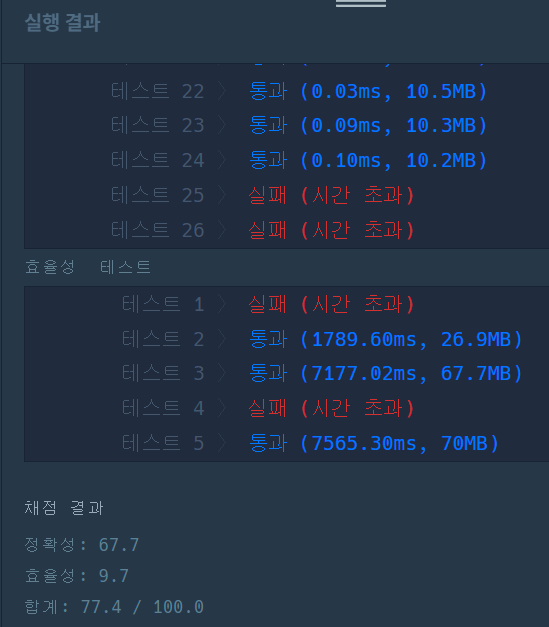

In [61]:
class food:
    # 초기화
    def __init__(self, scoville):
        self.scoville = scoville
        self.next = None
    # 다음 노드 설정
    def set_next(self, next):
        self.next = next
    # 다음 노드 반환
    def get_next(self):
        return self.next
    # 스코빌 지수 설정
    def set_scoville(self, scoville):
        self.scoville = scoville
    # 스코빌 지수 반환
    def get_scoville(self):
        return self.scoville
    # 정렬
    def sort(self):
        # 반환할 헤드 노드
        new_h = self.get_next()
        # 다음 노드가 없으면 종료
        if new_h == None: return self
        if self.get_scoville() < new_h.get_scoville(): return self
        # 이전, 현재, 다음 노드 설정
        prev = None
        curr = self
        next = self.get_next()
        # 다음노드가 없을 때까지 반복
        while next:
            # 현재 노드의 스코빌 지수가 다음 노드의 스코빌 지수보다 크면
            if curr.get_scoville() > next.get_scoville():
                # 현재노드의 위치를 다음 노드와 바꿈
                curr.set_next(next.get_next())
                next.set_next(curr)
                if prev: prev.set_next(next)
                prev = next
                next = curr.get_next()
            else:
                break
        return new_h

def solution(scoville, K):
    answer = 0
    # 스코빌지수가 낮은 음식부터 정렬
    scoville.sort()
    # 헤드 노드 생성
    head = None
    # 이전 노드 변수
    previouse = None
    # 음식들을 연결리스트로 만들기
    for scov in scoville:
        # 음식 객체 생성
        current = food(scov)
        # 헤드 노드가 없으면 헤드 노드로 지정
        if head == None: 
            head = current
            previouse = current
            continue
        # 이전 노드의 다음 노드로 지정, 이전 노드를 현재 노드로 지정
        previouse.set_next(current)
        previouse = current
    # 다음 노드가 없을 때까지 반복(남은 음식이 1개보다 적을 때까지 반복)
    while head.get_next():
        # h = head
        # while True:
        #     if h == None: break
        #     print(h.get_scoville(), end=' ')
        #     h = h.get_next()
        # print()
        # 헤드노드와 다음 노드의 스코빌 지수를 가져옴
        h_scv = head.get_scoville()
        n_scv = head.get_next().get_scoville()
        # print('현재, 다음 : ',h_scv, n_scv)
        # 현재 스코빌 지수가 K보다 크거나 같으면 종료
        if h_scv >= K: break
        # 다음 스코빌 지수를 계산후 다음 노드에 지정
        head.get_next().set_scoville(h_scv + n_scv * 2)
        # 다음 노드를 현재 노드로 지정
        head = head.get_next()
        # 정렬 -> 새로운 헤드를 반환
        head = head.sort()
        # 음식을 섞은 횟수 증가
        answer += 1
    h = head
    while True:
        if h == None: break
        print(h.get_scoville(), end=' ')
        h = h.get_next()
    print()
    # 남은 음식이 1개이고 스코빌 지수가 K보다 작으면 -1 반환
    if K > head.get_scoville():
        answer = -1
    return answer

In [62]:
print(solution([1, 2, 3], 6), 2)    #2
print(solution([1, 2, 3], 100), -1) #-1
print(solution([2, 2, 2, 2], 2), 0) #0

1 2 3 
3 5 
13 
2 2
1 2 3 
3 5 
13 
-1 -1
2 2 2 2 
2 2 2 2 
0 0


## 실패
- 연결 리스트를 구현해서 풀이.
    - 시간초과로 실패
    - 맨뒤로 이동시킬때, 시간이 오래걸리는듯.

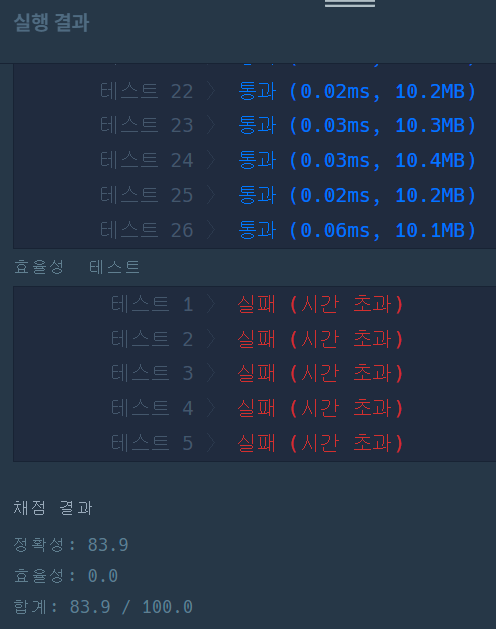

# 32. 이중우선순위큐
[문제 링크](https://school.programmers.co.kr/learn/courses/30/lessons/42628)